__`Introduction`__
This data set covers a domain for exercising the Finance and Housing data set.  The data contains information from the 1990 California census. This data set has 10 types of metrics such as the population, median housing prices, income, location etc. for each block group in the state of California. Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset. 

__`AIM`__ To predict the median hosuing price in the State of California

__LOAD MODULES__

In [1]:
import pandas as pd
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

__`Import Data`__

In [2]:
df = pd.read_csv('/Users/nitinmahajan/Desktop/Springboard/Capstone_1/housing.csv')

__`Exploratory Data Analysis`__

In [3]:
df.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


`OBSERVATIONS`

- 9 numerical and one categorical variable
   
- no missing values or null values in variables (20640) except total_bedrooms (20633) 

In [6]:
df.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


`OBSERVATIONS`

- The count, mean, min, and max rows are self-explanatory. 
- Standard deviation (std) - dispersion of data points.
- The 25%, 50%, and 75% show the corresponding percentiles
- There is a huge difference in the 75%percantile and max values, probability of having significant outliers in  the variables : total_rooms, population, median income, bedroom.

In [7]:
df['ocean_proximity'].value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

`NOTE`

- As ocean_proximity is a categorical varibale, we have to check what are the counts 
- ISLAND have only 5 counts...which is very low compared to otthers
- We might merge ISLAND in another object or ignore that.

__`Visual Exploratory Data Analysis`__

`HEATMAP FOR CHECKING MISSING VALUES`

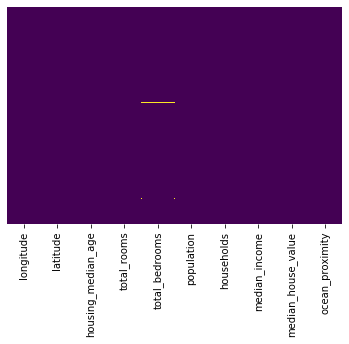

In [8]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

__`OBSERVATION`__ Yellow line in the center of total_bedrooms shows presence of missing values

`Removing Missing Values`
- Removing the 207 missing valaues (total Bedrooms) from all the data set. 

- The new DataSet named as df1

In [10]:
# we might need a list of numerical columns 
df_numerical  = df.drop('ocean_proximity', axis = 1)
df_numerical.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [11]:
# Similarly we might need a list of objects. 
# In this dataset we have only one object
df_objects = df.select_dtypes(include=['object'])
df_objects.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


`HISTOGRAMS`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c4da240>,
      dtype=object)

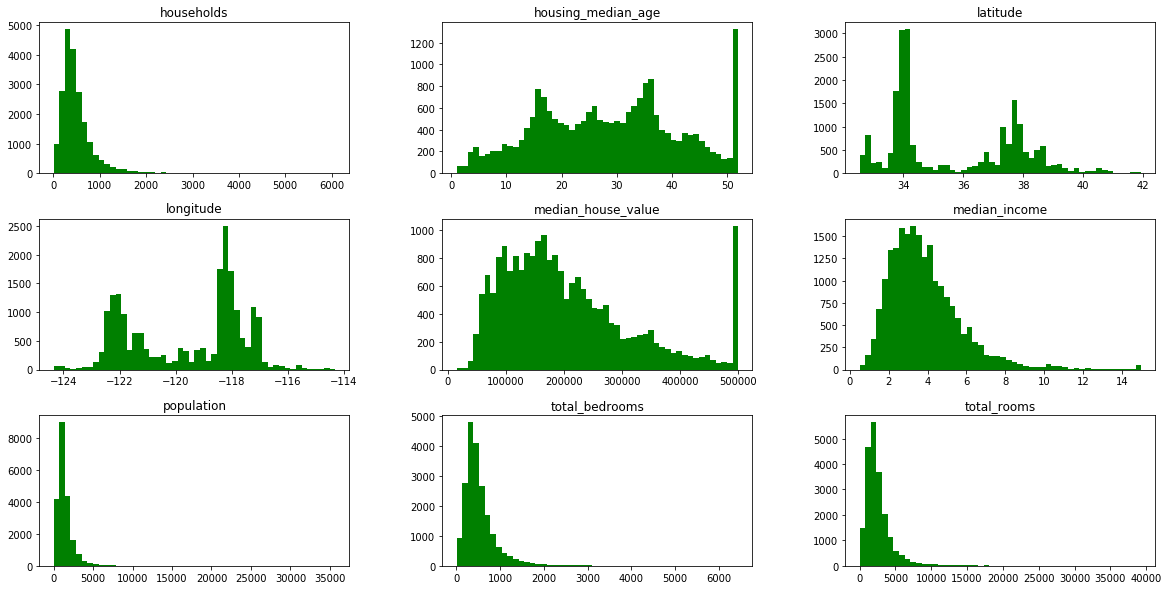

In [12]:
df.hist(bins=50, figsize=(20, 10), color = 'green', grid = False)

`OBSERVATION`
-  Just like `describe` , we use hitogram or box plot as visual tool to look at the numerical data
-  For example, you can see that slightly over 900 districts have a median_house_value equal to about $500,000
-  Median income : No units describes, it seems that it is expressed value*10000. e.g. if 12, that meanes 120, 000 or 120K.
- __NOTE__ - It is not necessary to have the units for the data points, but it is better to have , so that we can corrleate logically while making the models. 
- Many histograms are tail heavy: they extend much farther to the right of the median than to the left. We might need some transforming later. 
- Total rooms and total bedroomm, we can also make a new variable like rooms per household , something like that 
- population — most districts have population below 3000
- bedrooms — looks like most districts have between 300–600 bedrooms
- total rooms — most districts have around 3000 rooms

__`EXPLORING DATA CONTINUES`__

__Q: What is first thing comes to mind when we think of buying anything?__

_A: MONEY SAVINGS INCOME_

`CLOSURE LOOK AT THE MEDIAN INCOME`

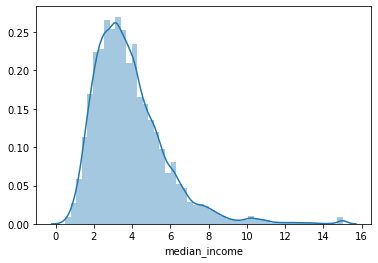

In [16]:
sns.distplot(df['median_income'])

`OBSERVATION`

- Right tail shift
- Majority of population have income between 2-6 ($20,000-$60,000)
- Some numbers go beyond 8 and max at $150,000

__`TO DO`__

_Median income data is continuous. So let’s make it discrete_

In [19]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

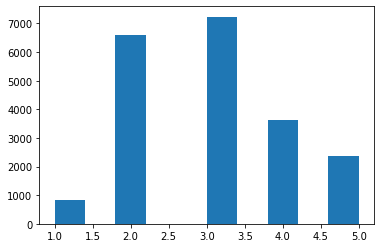

In [20]:
df["income_cat"].hist()
plt.grid(False)

`MACHINE LEARNING`

- Before we explore data more, lets split the data into test and train data set

<font color=blue >__Slicing housing data set into a training set and test set.__</font>
    
- test_size = 0.2 means we split test and train in a ratio of 20 to 80  
- putting number in parameter `randon_state`, makes sure that the data that will be genrated will always  generates the same shuffled indices.

__Now based on income categories, we’ll split our entire data into train (0.8) and test (0.2)__

_We are using stratified sampling technique here since we derived a new attribute called `income category`._

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [24]:
### As per the warning in the above, we used the reindex()
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.reindex(train_index)
    strat_test_set = df.reindex(test_index)

In [25]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

__We need to remove the income category from our training and test data sets.__

In [26]:
strat_train_set.drop(["income_cat"], axis=1, inplace=True)
strat_test_set.drop(["income_cat"], axis=1, inplace=True)

__Let’s create a copy of our training data set and visualize it using a scatter plot__

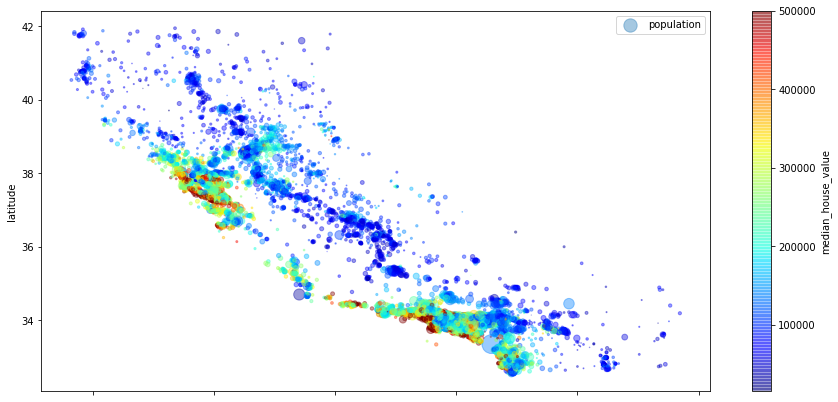

In [27]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7))
plt.legend()

#The radius of each circle represents the district’s population (option s)
#The color represents the price (option c).
#We use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

__If we look at the California map__, 
- Housing prices are much related to location and population density.
- Housing prices near ocean are higher except in northern california.

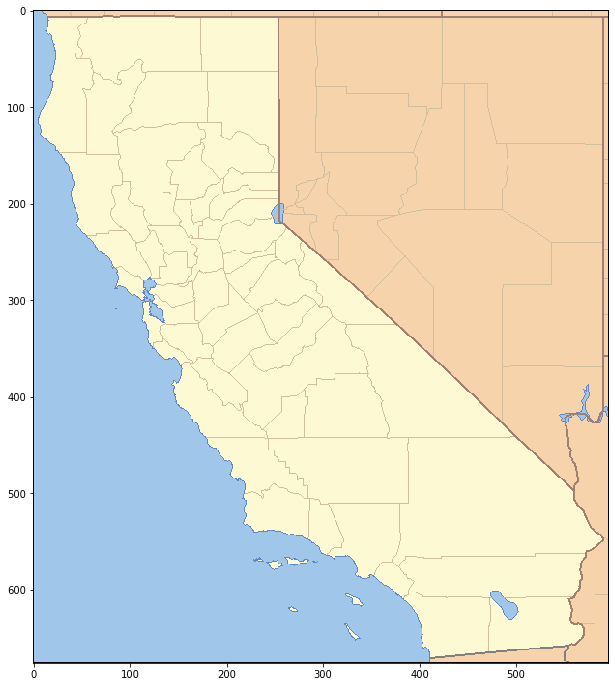

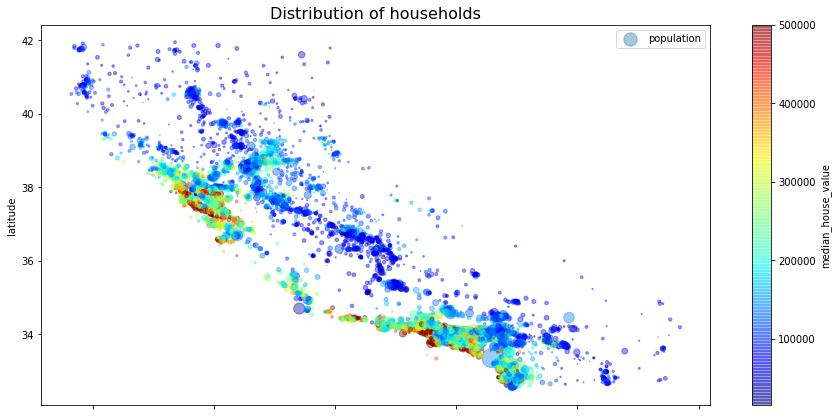

In [29]:
plt.figure(figsize=(12,12))
img=plt.imread('/Users/nitinmahajan/Desktop/California_Locator_Map.PNG')
plt.imshow(img)

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7))
plt.title("Distribution of households",size=16)
plt.legend()

__OVERLAP THESE TWO IMAGES__

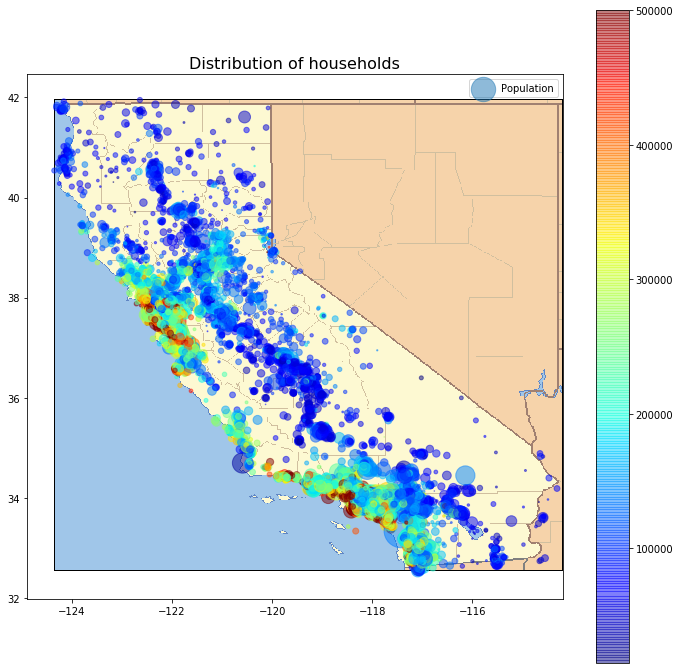

In [32]:
plt.figure(figsize=(12,12))
img=plt.imread('/Users/nitinmahajan/Desktop/California_Locator_Map.PNG')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=housing['longitude'],y=housing['latitude'],alpha=0.5,s=housing['population']/30,c=housing['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

__We are intrested to know which variables are important to determine the housing prices in the State of California__

__Correlation MAtrix would be good to start with__

__ALSO KEEP IN MIND THAT WE ARE DEALING WITH THE TRAINING DATA SET (DF2)__

In [34]:
corr = housing.corr()
corr.style.background_gradient(cmap='spring')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.924478,-0.105848,0.048871,0.0765985,0.10803,0.0630696,-0.0195833,-0.0474324
latitude,-0.924478,1,0.0057661,-0.0391837,-0.0724189,-0.115222,-0.077647,-0.0752054,-0.142724
housing_median_age,-0.105848,0.0057661,1,-0.364509,-0.325047,-0.29871,-0.306428,-0.11136,0.11411
total_rooms,0.048871,-0.0391837,-0.364509,1,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.0765985,-0.0724189,-0.325047,0.929379,1,0.87632,0.98017,-0.00973978,0.0476886
population,0.10803,-0.115222,-0.29871,0.855109,0.87632,1,0.904637,0.00238001,-0.02692
households,0.0630696,-0.077647,-0.306428,0.918392,0.98017,0.904637,1,0.0107813,0.0645063
median_income,-0.0195833,-0.0752054,-0.11136,0.200087,-0.00973978,0.00238001,0.0107813,1,0.68716
median_house_value,-0.0474324,-0.142724,0.11411,0.135097,0.0476886,-0.02692,0.0645063,0.68716,1


`OBSERVATIONS`

- Median Income is the most promising attribute to get Median Hosung Price

- Looking at the Correaltion Matrix, it seems that the important varibales are Total_rooms, Total Bedrooms,  Population,  Household and Median Income. 

- Total rooms and totoal bedrooms in a house look very similar, so we can drop either of them 

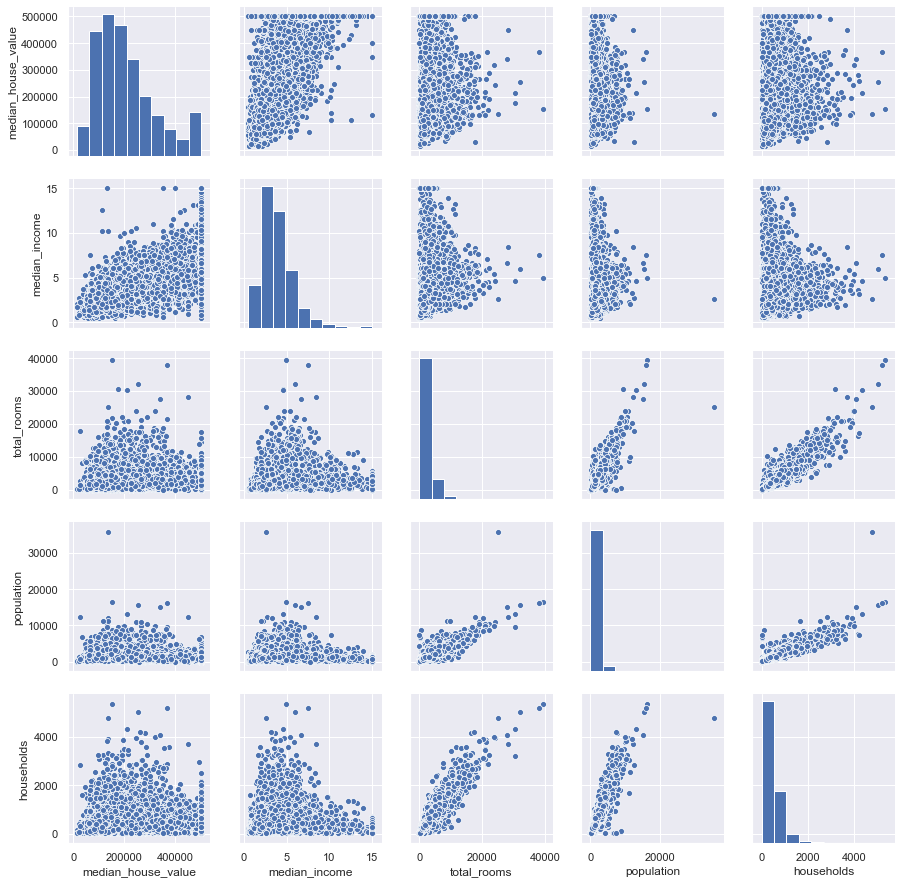

In [36]:
sns.set()
sns.pairplot(housing[['median_house_value','median_income','total_rooms','population', 'households']])


`sns.pairplot` is another way to show the correlation matirix, however, the heatmap cleary show the same thing. 

-- But this is another way to show the correlation matrix 


__As per the correlation matrix table_ Median Income is the most promising attribute to get Median Hosung Price__

__LET's EXPLORE THESE TWO VARAIBLES TOGETHER__

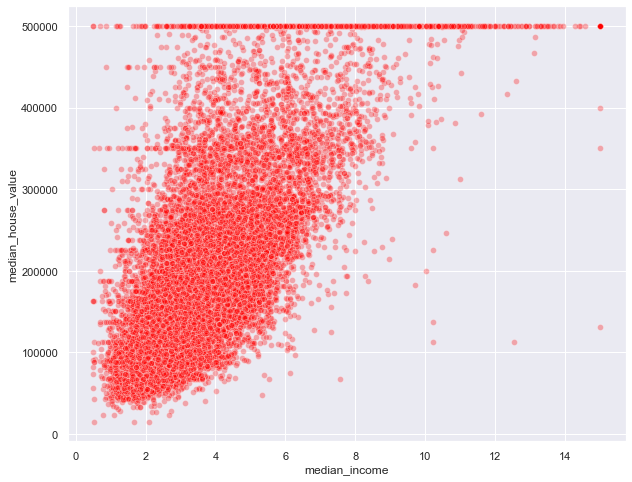

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = "median_income", y = "median_house_value", data= housing, alpha=0.3, color = 'red')

__`OBSERVATIONS`__

-  Correlation is strong (0.686117) as per the table above
-  Clear Horozontal lines at 500,000, 450,000, 350,000, perhaps one around 280,000, and a few more below that.
-  This kind of data may degrade the performance of model.

_As mentione before that, total rooms and total bedrooms, are quite similar and do not add much. We can remove one variable and, then we can also make  a new varibale like rooms per household or total bedrooms per household._

`NEW ATTRIBUTES`

In [39]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


__RE_RUN THE CORRELATION__

In [40]:
### REMEBER NOW HOUSING DATA HAVE THEE NEW VARAIBLES
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

`OBSERVATION` 

Bedrooms variable is better correlated compared to total bedrooms 

__ONE MORE TIME: WHAT IS OUR AIM__ "TO PREDICT THE HOUING PRICE"__

`Remember`

Independent varaiables (Predictor) and Dependent variables (Label/Target)

IN THIS DATA SET OUR DEPENDENT VARAIBLE IS `MEDIAN_HOUSE_VALUE`

LETS CREATE A NEW `TRAINING DATA` SET

In [41]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [44]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


BEFORE JUMP INTO THE MACHINE LEARNING MODELS , LET CLEAN THE DATA 
- Total_bedrooms had some missing values__

__How to fix the Missing Values__
- remove the rows of missing values "(housing.dropna(subset=["total_bedrooms"])"
- remove the entire attribute "housing.drop("total_bedrooms", axis=1)"
- set missing value to some value like zero, median or mean

In [49]:
## SimpleImputer method ##
## Scikit-Learn provides a function to take care of missing values: `SimpleImputer`
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") ## We are filling NA with MEDIAN
housing_num = housing.drop('ocean_proximity', axis=1) # Median can only be calculated for the numerical variables, 
                                                        # so drop Ocean_proximity
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


`MAKING A SCRIPT`
- In MAchine Learning we might need to run few steps again , to check different models. So to run different steps one by one we can write a script or pipeline 

__BEFORE WE MOVE AHEAD WE HAVE TO__
- define the individiual components of the script
- combine them using `Feature Union`

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [48]:
# this component gives us the flexibility to add extra attributes to our pipeline
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
# this component allows us to select entire or partial dataframe
# or in simpler words we can tell which attributes we want in our pipeline
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):return self
    
    def transform(self, X):return X[self.attribute_names].values

-Label Binarizer converts---
-text to integers---
-integers to one hot vectors---
-think of one hot vectors as an array which has all 0’s but only one 1!

In [50]:
class MyLabelBinarizer(TransformerMixin):
    
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=0):return self.encoder.transform(x)

We have Numerical and Categorical OBJECTS

In [52]:
num_attribs = list(housing_num)  # NUmericals
cat_attribs = ["ocean_proximity"]  # Categorical
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer

__SCRIPT/PIPELINE IS READY__

LETS GO OVER IT AND THEN RUN

`DataFrameSelector` — Which attributes we want to include
`SimpleImputer` — to fill NA values with median (or mean or 0) # Here we chose median
`CombinedAttributesAdder` — Our custom class to add new attributes to our model
`Std Scaler` — to bring all attributes to the same level

In [55]:
# FOR numerical pipeline
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [56]:
# FOR categorical pipeline
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

In [58]:
## FULL PIPELINE - INCLUDE BOTH (NUM and CAT)
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

`NOTE` - As mentioned earlier that we need to run same steps again ..so we can run the pipeline for training dataset

In [59]:
housing_prepared = full_pipeline.fit_transform(housing)

In [62]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

`REMEMBER` - `Housing_Prepared` is an array not data frame

__YAY!!!! AT THIS POINT WE CAN SAY THAT DATA SET IS READY FOR MAKING THE MACHINE LEARNING MODELS__

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()

In [64]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

In [65]:
# find root mean squared error, scores is an array of negative numbers
rmse_scores = np.sqrt(-scores)

In [66]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

Mean:		  69052.46136345083 
Standard Deviation: 2731.674001798346


`INFERENCE` - Housing price prediction error is 69052 + 2731 or 69052 - 2731

HOWEVER the median for housing price is between 120K to 265K (from `describe` output)

__This value does not looks correct..or in other words we can say that model is underfitted.__

__Another point is that the selected features do not provide enough information to make good predictions__

In [326]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1_numerical, test_size=0.2) 
# if you dont put `random state=42`, 
#the data will be different evertime 

In [67]:
scores2 = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=5)
rmse_scores2 = np.sqrt(-scores2)
print("Mean:\t\t ", rmse_scores2.mean(), "\nStandard Deviation:", rmse_scores2.std())

Mean:		  69112.08114978828 
Standard Deviation: 2193.0526041684498


__`Decision Tree Regressor with K-fold cross validation`__

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()
scores3 = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

In [70]:
# see the 10 scores
scores3

array([-4.76884934e+09, -4.50112177e+09, -4.98643408e+09, -4.72868715e+09,
       -4.92778652e+09, -5.50372543e+09, -4.91264606e+09, -4.98855392e+09,
       -5.67717569e+09, -5.14420071e+09])

In [71]:
# find root mean squared error
rmse_scores3 = np.sqrt(-scores3)

In [72]:
print("Mean:\t\t ", rmse_scores3.mean(), "\nStandard Deviation:", rmse_scores3.std())

Mean:		  70770.27706120534 
Standard Deviation: 2342.2107496640274


`INFERENCE Decision Tree`

- Here we have error of 70770 with ± 2342.
- decision tree model is a little worse than linear regression model

__`Ensemble Learning — Random Forest Regressor`__

In [73]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

/Users/nitinmahajan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  52836.60966735558 
Standard Deviation: 2081.4439271588353


`INFERENCE - Ensemble Learning — Random Forest Regressor`

- We have prediction error of 52836 with +/- 2081
- Ensemble learning with Random Forest  performed the best out of the three
- Ensemble learning - Building a model on top of the other one

__Prediction Errors with three different models :__
- Linear Model = 69052 ±  2731
- Decision Tree Regressor = 70770 ± 2342.
- Ensemble Learning — Random Forest Regressor = 52836 ±  2081

__`FINE_TUNING OF MODEL`__

- As the name suggest, we have th emodel but, now we have to fine tune this. Consider this as the fine tuning for searching a radio station to listen best sound. 

- -Out of three models tested, Random Forest is best. 

- We can start with the method GridSearch . IN this method we have to tell our model about the hyperparameters. Also, Grid search is good, when we have small number of hyperparameters and samples.

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [76]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [77]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

__max_features=8 and n_estimators=30__

In [78]:
cvres = grid_search.cv_results_
print("{}\t\t {}\n".format('Mean Score','Parameters'))
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    x = np.sqrt(-mean_score)
    y = params
    print("{:.2f}\t {}".format(x, y))

Mean Score		 Parameters

63949.02	 {'max_features': 2, 'n_estimators': 3}
55429.81	 {'max_features': 2, 'n_estimators': 10}
53090.48	 {'max_features': 2, 'n_estimators': 30}
60622.61	 {'max_features': 4, 'n_estimators': 3}
52932.90	 {'max_features': 4, 'n_estimators': 10}
50617.04	 {'max_features': 4, 'n_estimators': 30}
59313.24	 {'max_features': 6, 'n_estimators': 3}
52164.46	 {'max_features': 6, 'n_estimators': 10}
50135.91	 {'max_features': 6, 'n_estimators': 30}
59267.93	 {'max_features': 8, 'n_estimators': 3}
52540.50	 {'max_features': 8, 'n_estimators': 10}
49934.70	 {'max_features': 8, 'n_estimators': 30}
63066.06	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54136.02	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60318.68	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52634.36	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59415.22	 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
52135.76	 {'bootstrap': False, '

- _Find the minimum value (Mean Score)
   __49934.70__
    
- _Compare this score vs the one before fine tuning_
    __49934 vs 52836 
    __FINE TUNING IMPROVES THE ERROR

__We have reached to the point, where we tested three models and finetuned the best. Now this is time to test the TEST SET we created in the beginning__ 

`TEST_SET`

In [79]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
# we prepare the data
X_test_prepared = full_pipeline.transform(X_test)

In [80]:
# do the prediction
final_predictions = final_model.predict(X_test_prepared)

In [81]:
# find mean square error
final_mse = mean_squared_error(y_test, final_predictions)
# find root mean square error
final_rmse = np.sqrt(final_mse)
final_rmse

47707.902082224886

The model is performing well. 

`HOWEVER`

There are few other ways we can explore the data set. Below are few examples :
- Instead of filling median in place of missing values, one can dlete the rows with the missing values 
- Remove outliers and run the similar analysis 
- Make new attributes, just like we did for rooms per household
